In [ ]:
# Import các thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/HR_Attrition.csv')

In [ ]:
# Bỏ cột Random Number
data.drop('Random Number', axis=1, inplace=True)

In [ ]:
# Xem trước dữ liệu
print(data.head())
print(data.info())
print("Tỷ lệ lớp Attrition:")
print(data['Attrition'].value_counts())

   Attrition Date  Age Attrition     BusinessTravel  DailyRate  \
0  4/30/2022 0:00   41       Yes      Travel_Rarely       1102   
1             NaN   49        No  Travel_Frequently        279   
2   5/3/2022 0:00   37       Yes      Travel_Rarely       1373   
3             NaN   33        No  Travel_Frequently       1392   
4             NaN   27        No      Travel_Rarely        591   

               Department  DistanceFromHome          Education EducationField  \
0                   Sales                 1  Associates Degree  Life Sciences   
1  Research & Development                 8        High School  Life Sciences   
2  Research & Development                 2  Associates Degree          Other   
3  Research & Development                 3    Master's Degree  Life Sciences   
4  Research & Development                 2        High School        Medical   

   EmployeeCount  ...  RelationshipSatisfaction  StandardHours  \
0              1  ...                         1   

## Feature Engineering

In [ ]:
# Kiểm tra giá trị thiếu
print(data.isnull().sum())

Attrition Date              1233
Age                            0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTi

In [ ]:
# Chuyển đổi biến mục tiêu Attrition thành số (Yes: 1, No: 0)
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Loại bỏ các cột không cần thiết và không mang thông tin
data.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours', 'Attrition Date'], axis=1, inplace=True)

In [ ]:
# Chuyển đổi các biến phân loại thành số bằng LabelEncoder
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
# Tách đặc trưng và biến mục tiêu
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Xem dữ liệu sau khi tiền xử lý
print(data.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          0               1                        2       0  ...   
1          3               1                        3       1  ...   
2          0               4                        4       1  ...   
3          4               1                        4       0  ...   
4          3               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                      

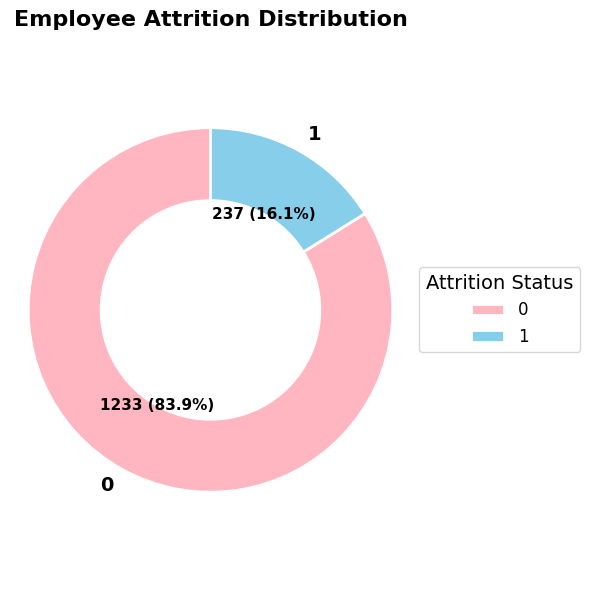

In [ ]:
# Vẽ donut chart (pie chart có lỗ ở giữa) với màu hồng và xanh biển nhạt đẹp
fig, ax = plt.subplots(figsize=(6, 6))
# Dữ liệu
labels = attrition_counts.index
sizes = attrition_counts.values

# Chọn màu đẹp hơn - hồng nhạt và xanh dương nhạt
colors = ['#FFB6C1', '#87CEEB']  # Light Pink và Sky Blue
# Hoặc có thể dùng: ['#FFC0CB', '#ADD8E6'] - Pink và Light Blue
# Hoặc: ['#FFE4E1', '#E6F3FF'] - Misty Rose và Alice Blue

# Vẽ donut chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f'{int(round(pct * sum(sizes) / 100))} ({pct:.1f}%)',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2),
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Cân chỉnh font chữ cho labels và percentages
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
    autotext.set_color('black')

# Thêm legend
ax.legend(wedges, labels,
          title="Attrition Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          title_fontsize=14)

# Đặt tiêu đề
ax.set_title('Employee Attrition Distribution',
             fontsize=16,
             loc="center",
             fontweight='bold',
             pad=10)

# Đảm bảo chart tròn đều
ax.axis('equal')

# Hiển thị
plt.tight_layout()
plt.show()

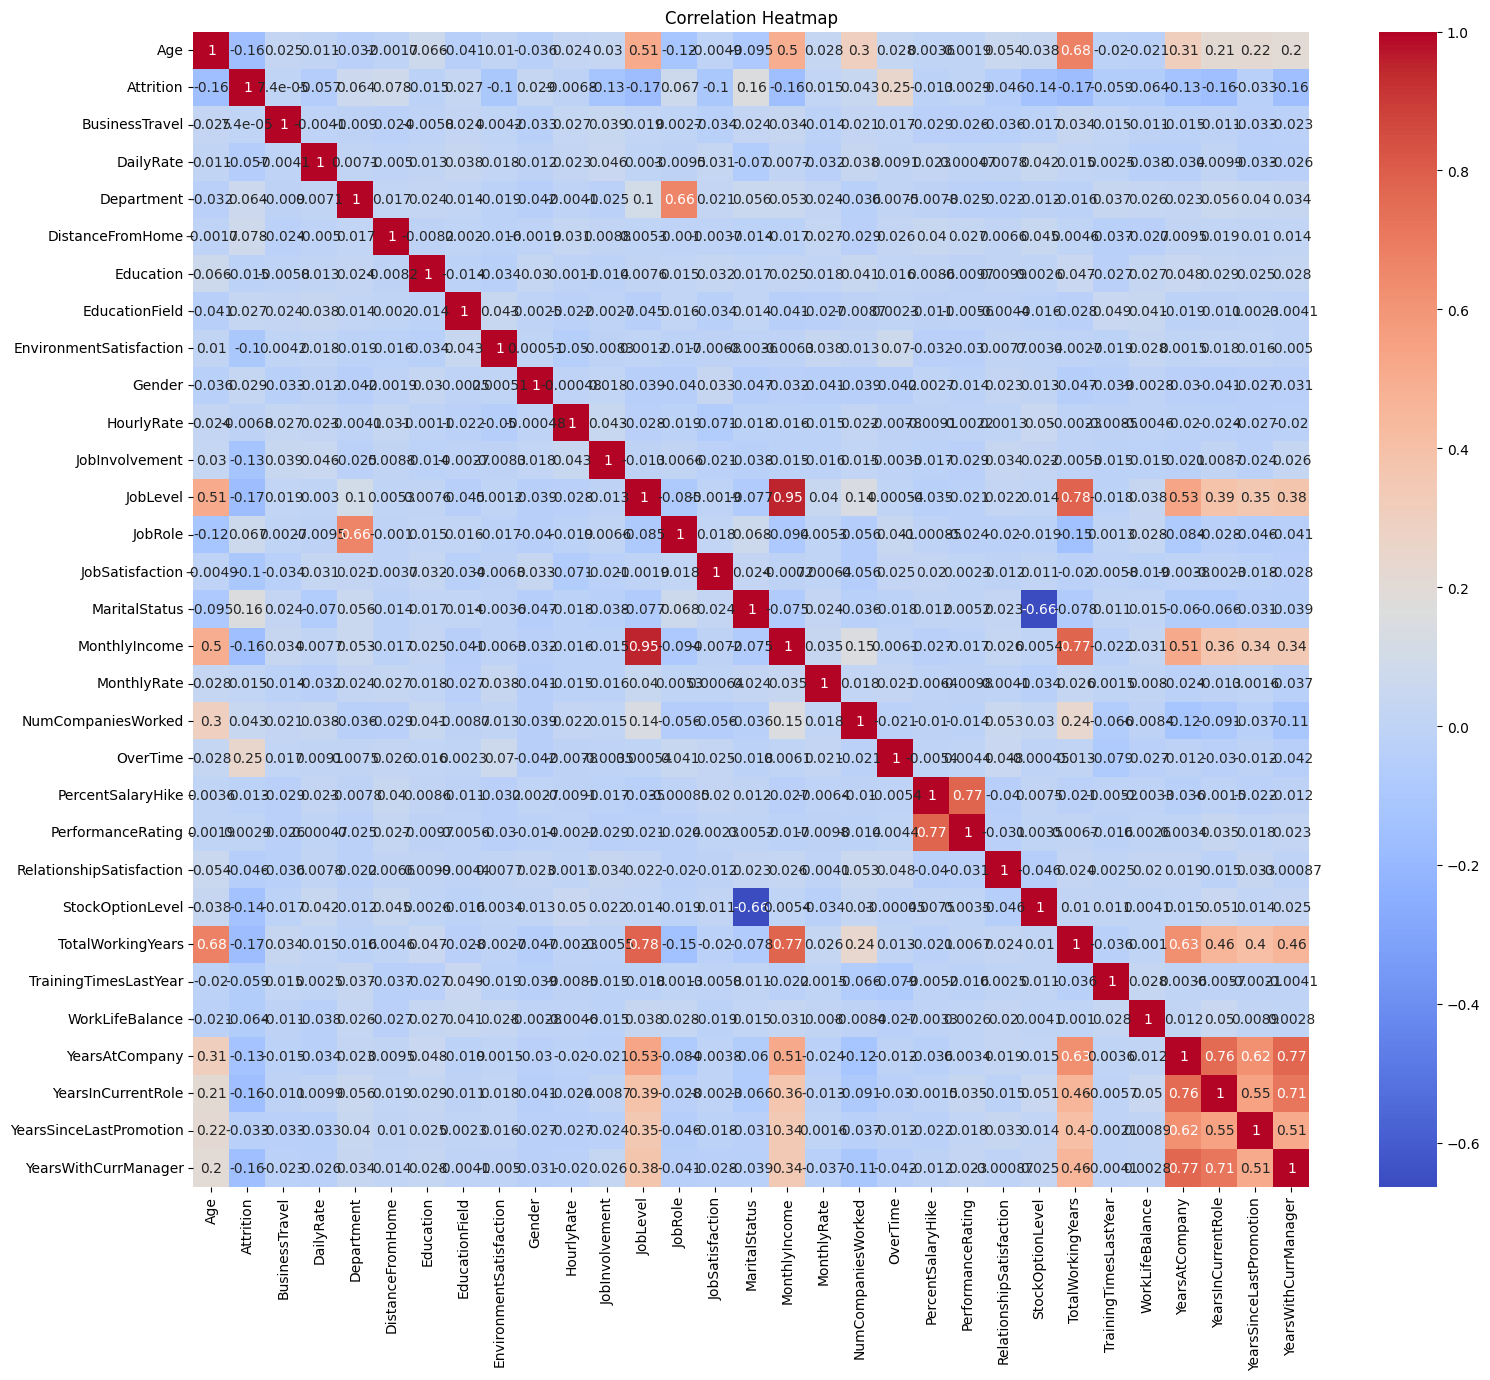

In [ ]:
# Ma trận tương quan giữa các biến
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Kiểm tra các cặp biến có tương quan cao (>0.7 hoặc <-0.7)
threshold = 0.7
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# In các cặp biến có tương quan cao
if high_corr_pairs:
    print("\nCác cặp biến có tương quan cao (>|0.7|):")
    for var1, var2, corr in high_corr_pairs:
        print(f"{var1} và {var2}: {corr:.4f}")
else:
    print("\nKhông có cặp biến nào có tương quan cao (>|0.7|).")

# Tính VIF và loại bỏ biến có VIF > 10
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Chuyển X_scaled thành DataFrame để giữ tên cột
X_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nTính VIF ban đầu:")
vif_data = calculate_vif(X_df)
print(vif_data.sort_values(by='VIF', ascending=False))

# Loại bỏ tuần tự các biến có VIF > 10
while vif_data['VIF'].max() > 10:
    # Tìm biến có VIF cao nhất
    max_vif_var = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
    print(f"\nLoại bỏ biến '{max_vif_var}' với VIF = {vif_data['VIF'].max():.4f}")

    # Loại bỏ biến
    X_df = X_df.drop(columns=[max_vif_var])

    # Tính lại VIF
    vif_data = calculate_vif(X_df)
    print("\nVIF sau khi loại bỏ:")
    print(vif_data.sort_values(by='VIF', ascending=False))

# Cập nhật X_scaled sau khi loại bỏ biến
X_scaled = X_df.values
print(f"\nCác biến còn lại sau khi xử lý đa cộng tuyến: {list(X_df.columns)}")


Các cặp biến có tương quan cao (>|0.7|):
JobLevel và MonthlyIncome: 0.9503
JobLevel và TotalWorkingYears: 0.7822
MonthlyIncome và TotalWorkingYears: 0.7729
PercentSalaryHike và PerformanceRating: 0.7735
YearsAtCompany và YearsInCurrentRole: 0.7588
YearsAtCompany và YearsWithCurrManager: 0.7692
YearsInCurrentRole và YearsWithCurrManager: 0.7144

Tính VIF ban đầu:
                    Variable        VIF
11                  JobLevel  11.883842
15             MonthlyIncome  11.082333
23         TotalWorkingYears   4.824336
26            YearsAtCompany   4.610074
29      YearsWithCurrManager   2.780907
27        YearsInCurrentRole   2.728337
19         PercentSalaryHike   2.522635
20         PerformanceRating   2.519280
0                        Age   2.021157
3                 Department   1.943769
12                   JobRole   1.892999
14             MaritalStatus   1.840059
22          StockOptionLevel   1.818869
28   YearsSinceLastPromotion   1.678918
17        NumCompaniesWorked   1.2

## Huấn luyện mô hình

In [ ]:
from imblearn.combine import SMOTEENN
# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Kiểm tra phân bố lớp sau khi cân bằng
print("\nPhân bố lớp sau khi cân bằng:")
print(pd.Series(y_balanced).value_counts())


Phân bố lớp sau khi cân bằng:
Attrition
1    1233
0    1233
Name: count, dtype: int64


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}
def evaluate_model(y_true, y_pred, y_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob) if y_prob is not None else 0
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC': roc_auc}

In [ ]:
# Thiết lập K-Fold với 5 fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu kết quả
results = {name: {'train': [], 'test': [], 'cm': [], 'fpr': [], 'tpr': []} for name in models.keys()}

for name, model in models.items():
    train_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], 'ROC AUC': []}
    test_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': [], 'ROC AUC': []}

    for train_idx, test_idx in kf.split(X_balanced):
        # Chia dữ liệu
        X_train, X_test = X_balanced[train_idx], X_balanced[test_idx]
        y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]

        # Huấn luyện mô hình
        model.fit(X_train, y_train)

        # Dự đoán
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Dự đoán xác suất cho ROC AUC
        y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, 'predict_proba') else None
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Đánh giá
        train_eval = evaluate_model(y_train, y_train_pred, y_train_prob)
        test_eval = evaluate_model(y_test, y_test_pred, y_test_prob)

        # Lưu kết quả
        for metric in train_metrics:
            train_metrics[metric].append(train_eval[metric])
            test_metrics[metric].append(test_eval[metric])

        # Lưu ma trận nhầm lẫn và ROC curve cho fold cuối cùng
        results[name]['cm'].append(confusion_matrix(y_test, y_test_pred))
        if y_test_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_test_prob)
            results[name]['fpr'].append(fpr)
            results[name]['tpr'].append(tpr)

    # Tính trung bình các chỉ số
    results[name]['train'] = {metric: np.mean(values) for metric, values in train_metrics.items()}
    results[name]['test'] = {metric: np.mean(values) for metric, values in test_metrics.items()}

In [ ]:
# In kết quả
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH")
for name in models.keys():
    print(f"\n{name}")
    print("Tập Train:")
    for metric, value in results[name]['train'].items():
        print(f"{metric}: {value:.4f}")
    print("Tập Test:")
    for metric, value in results[name]['test'].items():
        print(f"{metric}: {value:.4f}")

    # Final Classification Report dựa trên trung bình tập Test
    print("\nFinal Classification Report:")
    test_metrics = results[name]['test']

    # Giả định support cân bằng (do SMOTE)
    total_samples_per_fold = len(y_balanced) // 10  # Số mẫu trung bình mỗi fold
    class_support = total_samples_per_fold // 2  # Mỗi lớp chiếm 50% do SMOTE

    # Tạo báo cáo
    print(f"{'':<15} {'precision':<10} {'recall':<10} {'f1-score':<10} {'support':<10}")
    print(f"{'No Attrition':<15} {test_metrics['Precision']:<10.4f} {test_metrics['Recall']:<10.4f} {test_metrics['F1']:<10.4f} {class_support:<10.0f}")
    print(f"{'Attrition':<15} {test_metrics['Precision']:<10.4f} {test_metrics['Recall']:<10.4f} {test_metrics['F1']:<10.4f} {class_support:<10.0f}")
    print(f"{'accuracy':<15} {test_metrics['Accuracy']:<10.4f} {'':<10} {'':<10} {total_samples_per_fold:<10.0f}")
    print(f"{'macro avg':<15} {test_metrics['Precision']:<10.4f} {test_metrics['Recall']:<10.4f} {test_metrics['F1']:<10.4f} {total_samples_per_fold:<10.0f}")
    print(f"{'weighted avg':<15} {test_metrics['Precision']:<10.4f} {test_metrics['Recall']:<10.4f} {test_metrics['F1']:<10.4f} {total_samples_per_fold:<10.0f}")
    print("="*80)

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH

Logistic Regression
Tập Train:
Accuracy: 0.7887
Precision: 0.7789
Recall: 0.8063
F1: 0.7923
ROC AUC: 0.8695
Tập Test:
Accuracy: 0.7790
Precision: 0.7679
Recall: 0.7998
F1: 0.7831
ROC AUC: 0.8571

Final Classification Report:
                precision  recall     f1-score   support   
No Attrition    0.7679     0.7998     0.7831     123       
Attrition       0.7679     0.7998     0.7831     123       
accuracy        0.7790                           246       
macro avg       0.7679     0.7998     0.7831     246       
weighted avg    0.7679     0.7998     0.7831     246       

Decision Tree
Tập Train:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
ROC AUC: 1.0000
Tập Test:
Accuracy: 0.8443
Precision: 0.8236
Recall: 0.8761
F1: 0.8488
ROC AUC: 0.8447

Final Classification Report:
                precision  recall     f1-score   support   
No Attrition    0.8236     0.8761     0.8488     123       
Attrition       0.8236     0.8761     0.8488     

## Lựa chọn mô hình


Sử dụng mô hình: Random Forest
Top 10 đặc trưng quan trọng:
                    Feature  Importance
17                 OverTime    0.094110
21         StockOptionLevel    0.061246
22        TotalWorkingYears    0.052246
13            MaritalStatus    0.051191
0                       Age    0.049169
14            MonthlyIncome    0.047959
12          JobSatisfaction    0.047767
25           YearsAtCompany    0.047376
7   EnvironmentSatisfaction    0.046593
28     YearsWithCurrManager    0.040746


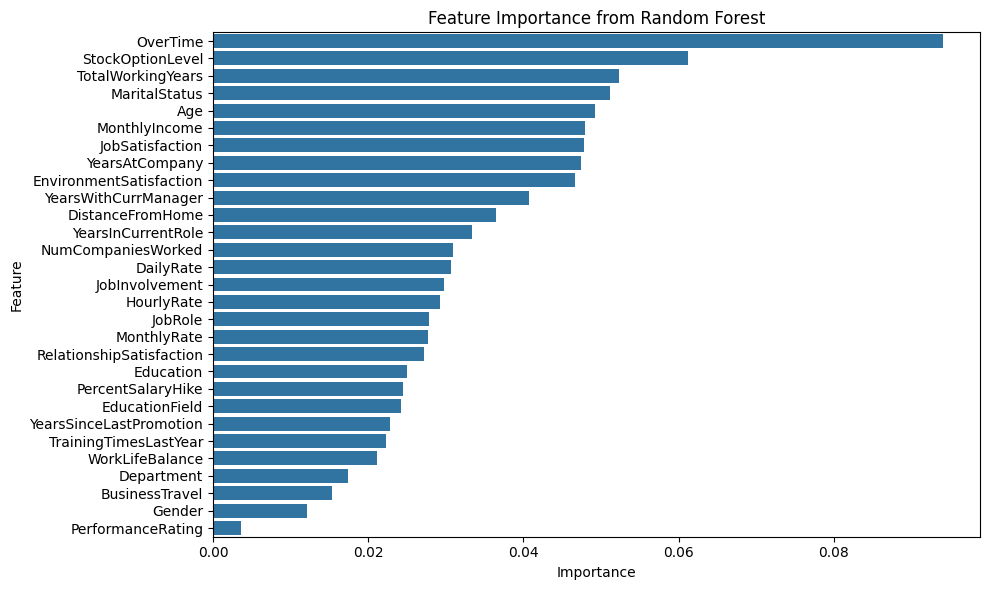

In [ ]:
# 1. Cố định sử dụng mô hình Random Forest
model_name = 'Random Forest'
rf_model = models[model_name]
print(f"\nSử dụng mô hình: {model_name}")

# 2. Dự đoán xác suất chỉ cho nhân viên chưa rời bỏ (Attrition == No)
data_no_attrition = data[data['Attrition'] == 0].copy()
X_no_attrition = data_no_attrition.drop('Attrition', axis=1)
X_no_attrition = X_no_attrition[X_df.columns]  # Chỉ giữ các cột còn lại sau VIF
data_no_attrition['Attrition_Probability'] = rf_model.predict_proba(X_no_attrition)[:, 1]

# Tạo DataFrame kết quả với cột Attrition_Probability
result_df = data.copy()
result_df['Attrition_Probability'] = np.nan  # Khởi tạo cột với NaN
result_df.loc[data['Attrition'] == 0, 'Attrition_Probability'] = data_no_attrition['Attrition_Probability']

# 3. Đánh giá tầm quan trọng đặc trưng bằng Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_df.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# In ra các đặc trưng quan trọng
print("Top 10 đặc trưng quan trọng:")
print(feature_importance.head(10))

# Vẽ biểu đồ tầm quan trọng đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

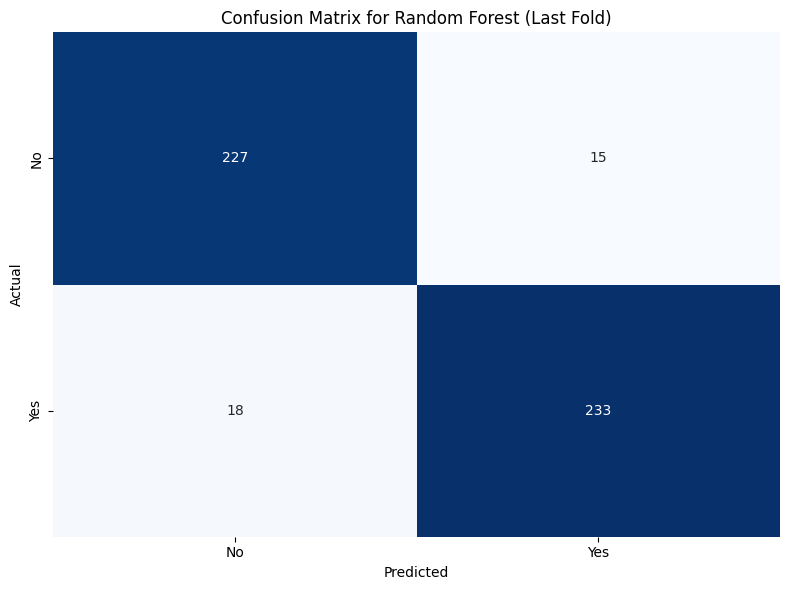

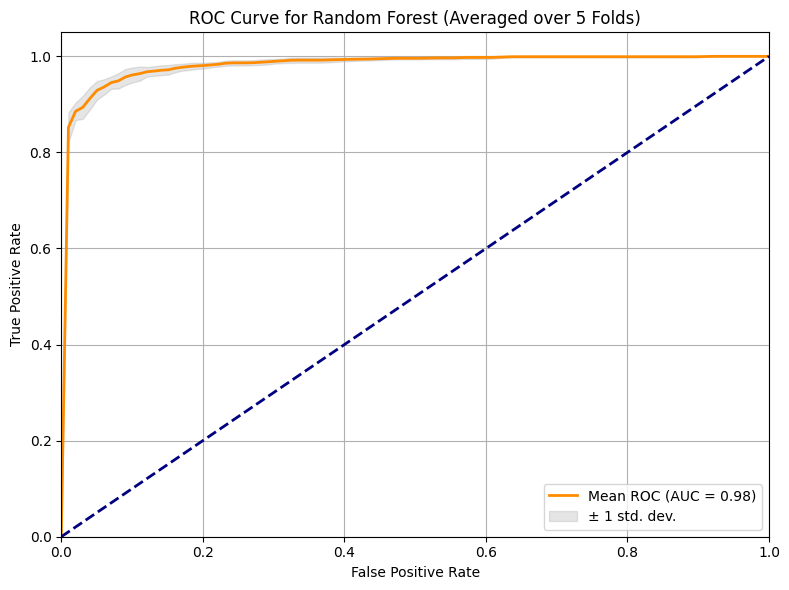

Mean AUC Score (Random Forest): 0.98


In [ ]:
from sklearn.metrics import auc

# Lấy kết quả của Random Forest từ results
rf_results = results['Random Forest']

# 1. Vẽ ma trận nhầm lẫn (dựa trên fold cuối cùng)
cm_last_fold = rf_results['cm'][-1]  # Ma trận nhầm lẫn của fold cuối cùng
plt.figure(figsize=(8, 6))
sns.heatmap(cm_last_fold, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest (Last Fold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# 2. Vẽ đường ROC curve (trung bình qua các fold)
plt.figure(figsize=(8, 6))
mean_fpr = np.linspace(0, 1, 100)  # Tạo lưới FPR chung để nội suy
tprs = []
aucs = []

# Tính TPR trung bình và AUC cho từng fold
for fpr, tpr in zip(rf_results['fpr'], rf_results['tpr']):
    # Nội suy TPR theo lưới FPR chung
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0  # Đảm bảo TPR bắt đầu từ 0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))

# Tính TPR trung bình và độ lệch chuẩn
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # Đảm bảo TPR kết thúc tại 1
mean_auc = auc(mean_fpr, mean_tpr)
std_tpr = np.std(tprs, axis=0)

# Vẽ đường ROC trung bình
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2,
         label=f'Mean ROC (AUC = {mean_auc:.2f})')
# Vẽ vùng độ lệch chuẩn
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr,
                 color='grey', alpha=0.2, label='± 1 std. dev.')

# Vẽ đường chéo (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (Averaged over 5 Folds)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# In giá trị AUC trung bình
print(f"Mean AUC Score (Random Forest): {mean_auc:.2f}")

In [ ]:
# Định nghĩa hàm phân nhóm nhân viên dựa trên xác suất và các chỉ số quan trọng
def segment_employee(row):
    prob = row['Attrition_Probability']
    if prob >= 0.6:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Áp dụng phân nhóm cho nhân viên chưa rời bỏ
data_no_attrition['Risk_Segment'] = data_no_attrition.apply(segment_employee, axis=1)

# Kiểm tra phân bố của các nhóm
print("Phân bố các nhóm rủi ro (chưa rời bỏ):")
print(data_no_attrition['Risk_Segment'].value_counts())

# Lưu dữ liệu đã xử lý
data_no_attrition.to_csv('employee_no_attrition_with_predictions.csv', index=False)

Phân bố các nhóm rủi ro (chưa rời bỏ):
Risk_Segment
Medium Risk    984
Low Risk       245
High Risk        4
Name: count, dtype: int64


In [ ]:
data_no_attrition.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.00,31.0,36.00,43.00,60.00
Attrition,1233.0,0.000000,0.000000,0.00,0.0,0.00,0.00,0.00
BusinessTravel,1233.0,1.607461,0.680200,0.00,1.0,2.00,2.00,2.00
DailyRate,1233.0,812.504461,403.208379,102.00,477.0,817.00,1176.00,1499.00
Department,1233.0,1.245742,0.517973,0.00,1.0,1.00,2.00,2.00
DistanceFromHome,1233.0,8.915653,8.012633,1.00,2.0,7.00,13.00,29.00
Education,1233.0,1.894566,1.536962,0.00,1.0,1.00,4.00,4.00
EducationField,1233.0,2.231955,1.310442,0.00,1.0,2.00,3.00,5.00
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.00,2.0,3.00,4.00,4.00
Gender,1233.0,0.593674,0.491346,0.00,0.0,1.00,1.00,1.00


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

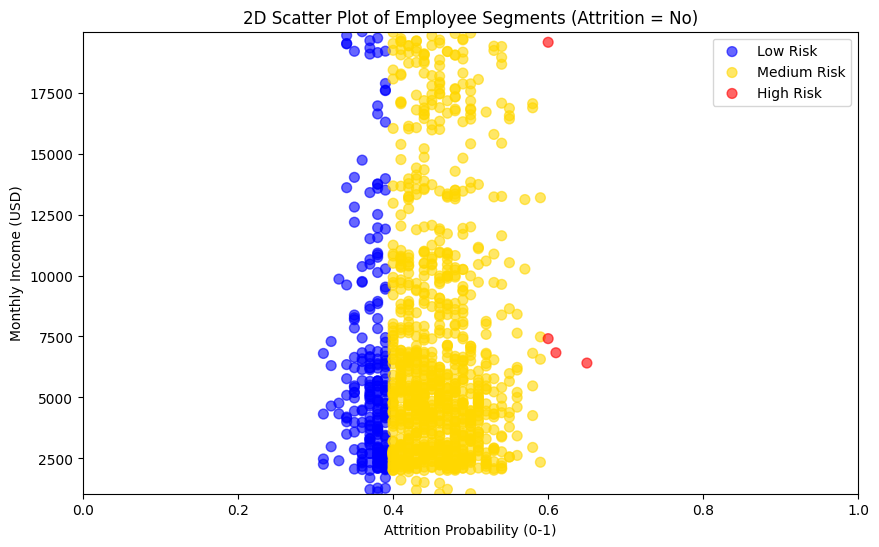

In [ ]:
# Chuẩn bị dữ liệu cho biểu đồ 2D
x = data_no_attrition['Attrition_Probability']
y = data_no_attrition['MonthlyIncome']
colors = data_no_attrition['Risk_Segment'].map({'Low Risk': 'blue', 'Medium Risk': 'gold', 'High Risk': 'red'})

# Tạo biểu đồ phân tán 2D
plt.figure(figsize=(10, 6))
for risk in ['Low Risk', 'Medium Risk', 'High Risk']:
    idx = data_no_attrition['Risk_Segment'] == risk
    plt.scatter(x[idx], y[idx], c=colors[idx], label=risk, s=50, alpha=0.6)

# Đặt nhãn cho các trục
plt.xlabel('Attrition Probability (0-1)')
plt.ylabel('Monthly Income (USD)')
plt.title('2D Scatter Plot of Employee Segments (Attrition = No)')

# Đặt giới hạn cho các trục
plt.xlim(0, 1)
plt.ylim(data_no_attrition['MonthlyIncome'].min(), data_no_attrition['MonthlyIncome'].max())

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

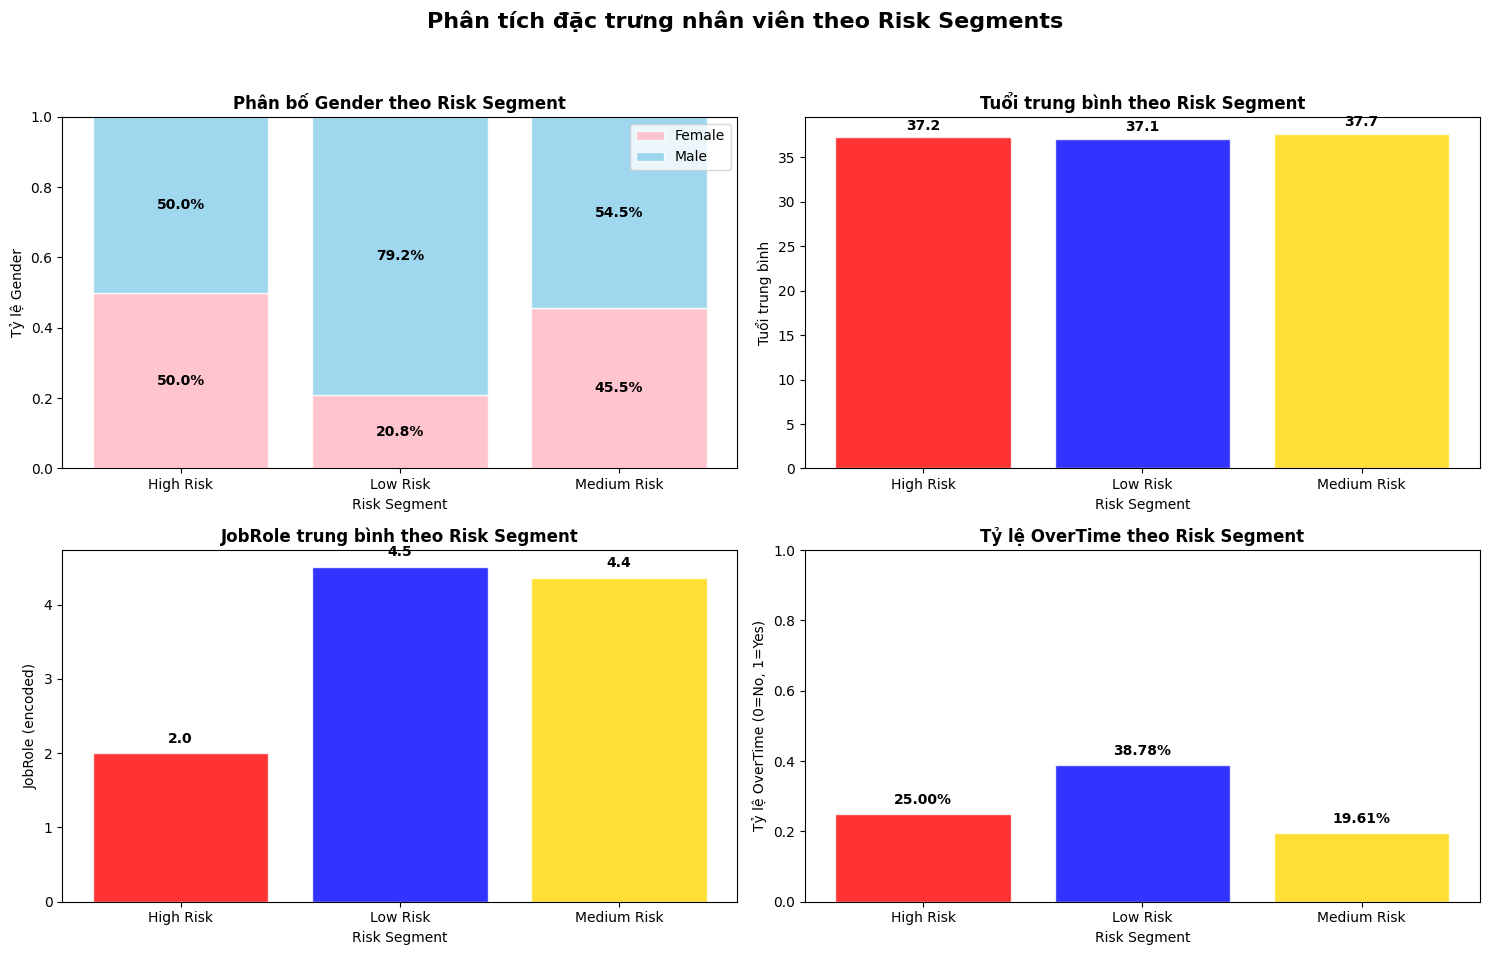

Kết quả phân tích theo Risk Segments:

High Risk:
  - Gender (tỷ lệ nam): 50.00%
  - Tuổi trung bình: 37.2 tuổi
  - JobRole (encoded): 2.0
  - Tỷ lệ OverTime: 25.00%

Low Risk:
  - Gender (tỷ lệ nam): 79.18%
  - Tuổi trung bình: 37.1 tuổi
  - JobRole (encoded): 4.5
  - Tỷ lệ OverTime: 38.78%

Medium Risk:
  - Gender (tỷ lệ nam): 54.47%
  - Tuổi trung bình: 37.7 tuổi
  - JobRole (encoded): 4.4
  - Tỷ lệ OverTime: 19.61%


In [ ]:
# Tính toán giá trị trung bình cho các biến theo Risk_Segment
analysis_data = data_no_attrition.groupby('Risk_Segment').agg({
    'Gender': 'mean',      # Giá trị trung bình (đã encode: 0/1)
    'Age': 'mean',         # Tuổi trung bình
    'JobRole': 'mean',     # Giá trị trung bình JobRole (đã encode)
    'OverTime': 'mean'     # Tỷ lệ OverTime (đã encode: 0/1)
}).reset_index()

# Định nghĩa màu sắc cho từng nhóm risk
risk_colors = {
    'Low Risk': 'blue',
    'Medium Risk': 'gold',
    'High Risk': 'red'
}

# Tạo màu cho từng nhóm
colors = [risk_colors[risk] for risk in analysis_data['Risk_Segment']]

# Vẽ biểu đồ 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Biểu đồ 1: Gender - Biểu đồ cột chồng
# Tính số lượng nam và nữ cho mỗi Risk Segment
gender_data = data_no_attrition.groupby(['Risk_Segment', 'Gender']).size().unstack(fill_value=0)
gender_percentage = gender_data.div(gender_data.sum(axis=1), axis=0)

# Vẽ biểu đồ cột chồng
bars_female = axes[0,0].bar(gender_percentage.index, gender_percentage[0],
                           label='Female', color='#FFB6C1', alpha=0.8, edgecolor='white')
bars_male = axes[0,0].bar(gender_percentage.index, gender_percentage[1],
                         bottom=gender_percentage[0], label='Male',
                         color='#87CEEB', alpha=0.8, edgecolor='white')

axes[0,0].set_title('Phân bố Gender theo Risk Segment', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Risk Segment')
axes[0,0].set_ylabel('Tỷ lệ Gender')
axes[0,0].set_ylim(0, 1)
axes[0,0].legend()

# Thêm phần trăm lên cột
for i, (idx, row) in enumerate(gender_percentage.iterrows()):
    # Phần trăm Female
    axes[0,0].text(i, row[0]/2, f'{row[0]:.1%}', ha='center', va='center', fontweight='bold')
    # Phần trăm Male
    axes[0,0].text(i, row[0] + row[1]/2, f'{row[1]:.1%}', ha='center', va='center', fontweight='bold')

# Biểu đồ 2: Age
bars2 = axes[0,1].bar(analysis_data['Risk_Segment'], analysis_data['Age'],
                      color=colors, alpha=0.8, edgecolor='white', linewidth=1)
axes[0,1].set_title('Tuổi trung bình theo Risk Segment', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Risk Segment')
axes[0,1].set_ylabel('Tuổi trung bình')

# Thêm giá trị lên cột
for bar in bars2:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ 3: JobRole
bars3 = axes[1,0].bar(analysis_data['Risk_Segment'], analysis_data['JobRole'],
                      color=colors, alpha=0.8, edgecolor='white', linewidth=1)
axes[1,0].set_title('JobRole trung bình theo Risk Segment', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Risk Segment')
axes[1,0].set_ylabel('JobRole (encoded)')

# Thêm giá trị lên cột
for bar in bars3:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ 4: OverTime
bars4 = axes[1,1].bar(analysis_data['Risk_Segment'], analysis_data['OverTime'],
                      color=colors, alpha=0.8, edgecolor='white', linewidth=1)
axes[1,1].set_title('Tỷ lệ OverTime theo Risk Segment', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Risk Segment')
axes[1,1].set_ylabel('Tỷ lệ OverTime (0=No, 1=Yes)')
axes[1,1].set_ylim(0, 1)

# Thêm giá trị lên cột
for bar in bars4:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{height:.2%}', ha='center', va='bottom', fontweight='bold')

# Tùy chỉnh bố cục
plt.suptitle('Phân tích đặc trưng nhân viên theo Risk Segments', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# In kết quả chi tiết
print("Kết quả phân tích theo Risk Segments:")
print("=" * 60)
for _, row in analysis_data.iterrows():
    risk = row['Risk_Segment']
    print(f"\n{risk}:")
    print(f"  - Gender (tỷ lệ nam): {row['Gender']:.2%}")
    print(f"  - Tuổi trung bình: {row['Age']:.1f} tuổi")
    print(f"  - JobRole (encoded): {row['JobRole']:.1f}")
    print(f"  - Tỷ lệ OverTime: {row['OverTime']:.2%}")

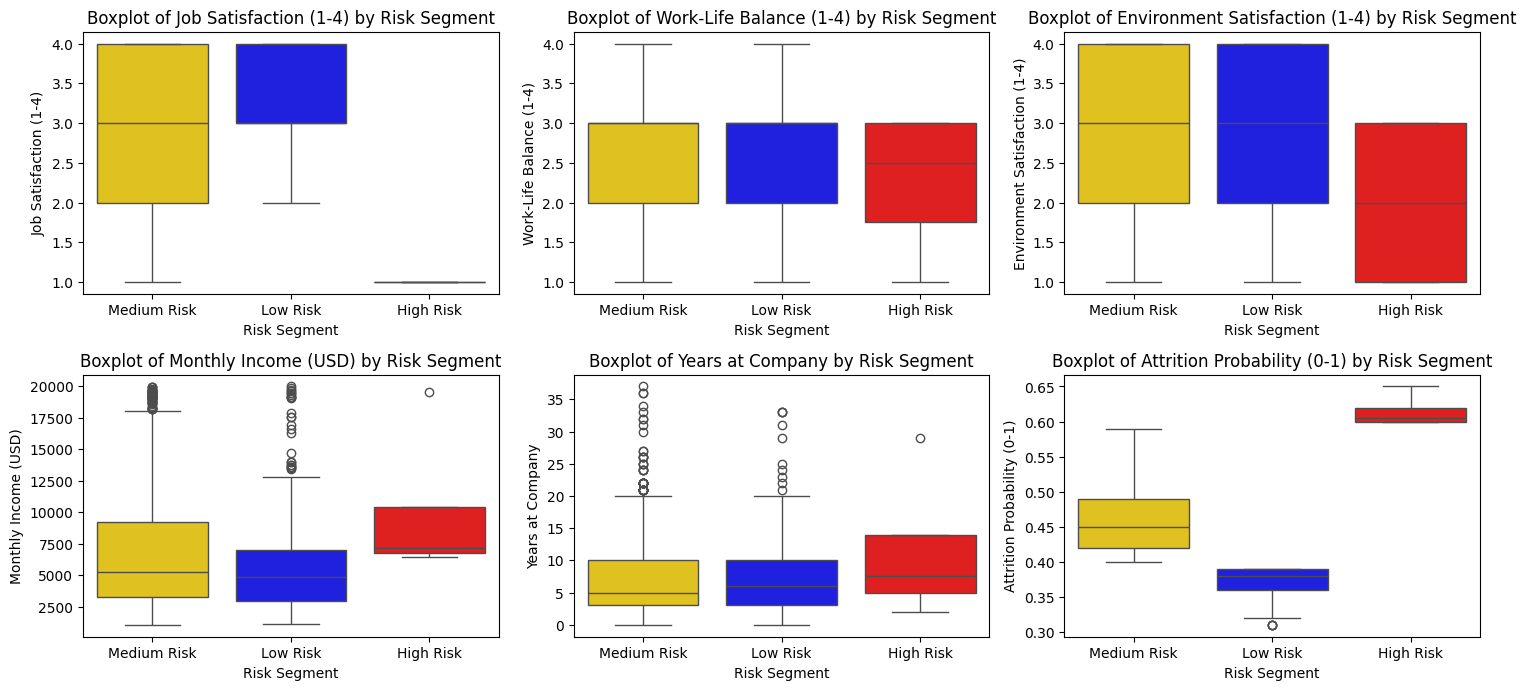

In [ ]:
# Danh sách các đặc trưng cần vẽ boxplot
features = [ 'JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'MonthlyIncome', 'YearsAtCompany', 'Attrition_Probability']
feature_labels = [ 'Job Satisfaction (1-4)', 'Work-Life Balance (1-4)', 'Environment Satisfaction (1-4)', 'Monthly Income (USD)', 'Years at Company', 'Attrition Probability (0-1)']

# Tạo biểu đồ boxplot
plt.figure(figsize=(15, 10))
for i, (feature, label) in enumerate(zip(features, feature_labels), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Risk_Segment', y=feature, data=data_no_attrition, palette={'Low Risk': 'blue', 'Medium Risk': 'gold', 'High Risk': 'red'})
    plt.title(f'Boxplot of {label} by Risk Segment')
    plt.xlabel('Risk Segment')
    plt.ylabel(label)

# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Chọn các đặc trưng quan trọng để phân tích đặc điểm nhóm
key_features = ['Attrition_Probability', 'MonthlyIncome', 'JobSatisfaction',
                'OverTime', 'YearsInCurrentRole', 'Age', 'EnvironmentSatisfaction']

# Thống kê mô tả đầy đủ cho từng nhóm
print("Thống kê mô tả đầy đủ theo nhóm rủi ro:")
for segment in data_no_attrition['Risk_Segment'].unique():
    print(f"\nNhóm: {segment}")
    segment_data = data_no_attrition[data_no_attrition['Risk_Segment'] == segment][key_features]
    stats = segment_data.describe().round(2)  # Làm tròn đến 2 chữ số thập phân
    print(stats)


Thống kê mô tả đầy đủ theo nhóm rủi ro:

Nhóm: Medium Risk
       Attrition_Probability  MonthlyIncome  JobSatisfaction  OverTime  \
count                 984.00         984.00           984.00     984.0   
mean                    0.46        6968.66             2.69       0.2   
std                     0.04        4874.01             1.13       0.4   
min                     0.40        1051.00             1.00       0.0   
25%                     0.42        3293.25             2.00       0.0   
50%                     0.45        5251.00             3.00       0.0   
75%                     0.49        9243.25             4.00       0.0   
max                     0.59       19973.00             4.00       1.0   

       YearsInCurrentRole     Age  EnvironmentSatisfaction  
count              984.00  984.00                   984.00  
mean                 4.48   37.68                     2.72  
std                  3.60    8.89                     1.11  
min                  0.00   18

In [ ]:
nhan_vien_nguy_co_cao = data_no_attrition[data_no_attrition['Attrition_Probability'] >= 0.6]

# Hiển thị kết quả
nhan_vien_nguy_co_cao.T

,310,411,530,895
Age,31,60,27,31
Attrition,0,0,0,0
BusinessTravel,2,2,2,2
DailyRate,106,422,608,1332
Department,0,1,1,1
DistanceFromHome,2,7,1,11
Education,1,1,0,0
EducationField,0,1,1,3
EnvironmentSatisfaction,1,1,3,3
Gender,1,0,0,1
